# Market Segmentation Analysis

In [34]:
#importing the required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [35]:
#loading the dataaset
df=pd.read_csv('mcdonalds.csv')
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [36]:
#All information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [37]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [38]:
df.shape

(1453, 15)

In [39]:
df.dtypes

yummy             object
convenient        object
spicy             object
fattening         object
greasy            object
fast              object
cheap             object
tasty             object
expensive         object
healthy           object
disgusting        object
Like              object
Age                int64
VisitFrequency    object
Gender            object
dtype: object

In [40]:
# Checking for the null value present in the data
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [41]:
df['Gender'].value_counts()
df['VisitFrequency'].value_counts()
df['Like'].value_counts()

+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

In [42]:
# Select the first 11 columns
MD_x = df.iloc[:, :11]

# Convert "Yes" to 1 and other values to 0
MD_x = (MD_x == "Yes").astype(int)

# Calculate the column means and round to 2 decimal places
col_means = MD_x.mean().round(2)

print(col_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


# step 4. Exploratory data analysis

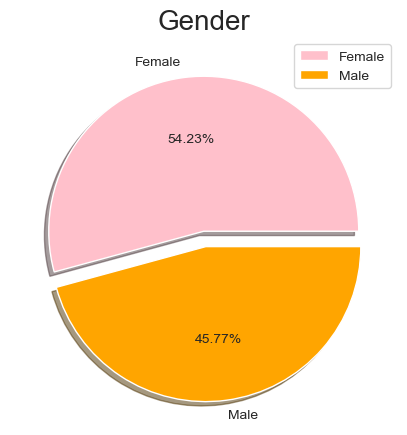

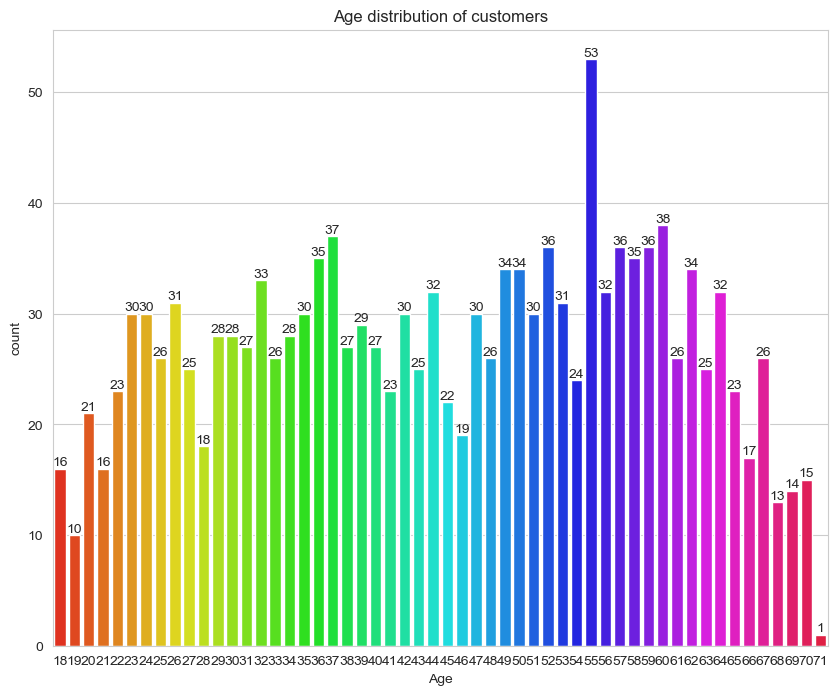

In [43]:
# Checking the customers of which Gender
labels = ['Female', 'Male']
size = df['Gender'].value_counts()
colors = ['pink', 'orange']
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (5, 8)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

#Age
plt.rcParams['figure.figsize'] = (10, 8)
f = sns.countplot(x=df['Age'],palette = 'hsv')
f.bar_label(f.containers[0])
plt.title('Age distribution of customers')
plt.show()
# Mcdonalds recieve more customers of age between 50-60 and 35-40.

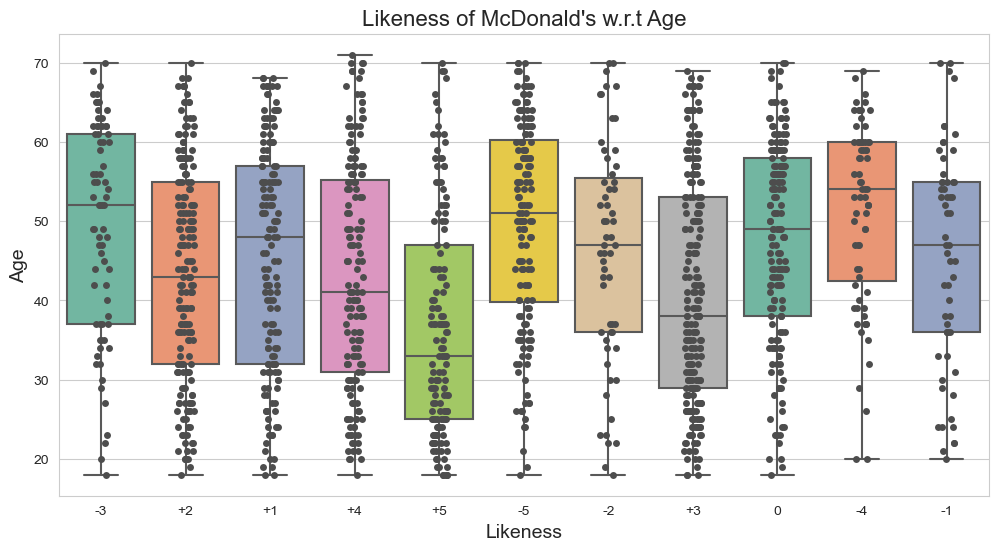

In [44]:
df['Like'] = df['Like'].replace({'I hate it!-5': '-5', 'I love it!+5': '+5'})

# Setting style of the plots
sns.set_style("whitegrid")

# Create a boxplot with a stripplot overlay
plt.figure(figsize=(12, 6))

# Boxplot
sns.boxplot(x="Like", y="Age", data=df, palette="Set2")

# Stripplot
sns.stripplot(x="Like", y="Age", data=df, jitter=True, color=".3", size=5)

plt.title('Likeness of McDonald\'s w.r.t Age', fontsize=16)
plt.xlabel('Likeness', fontsize=14)
plt.ylabel('Age', fontsize=14)

plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_10080\3560557268.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x="Like", y="Age",data=df,


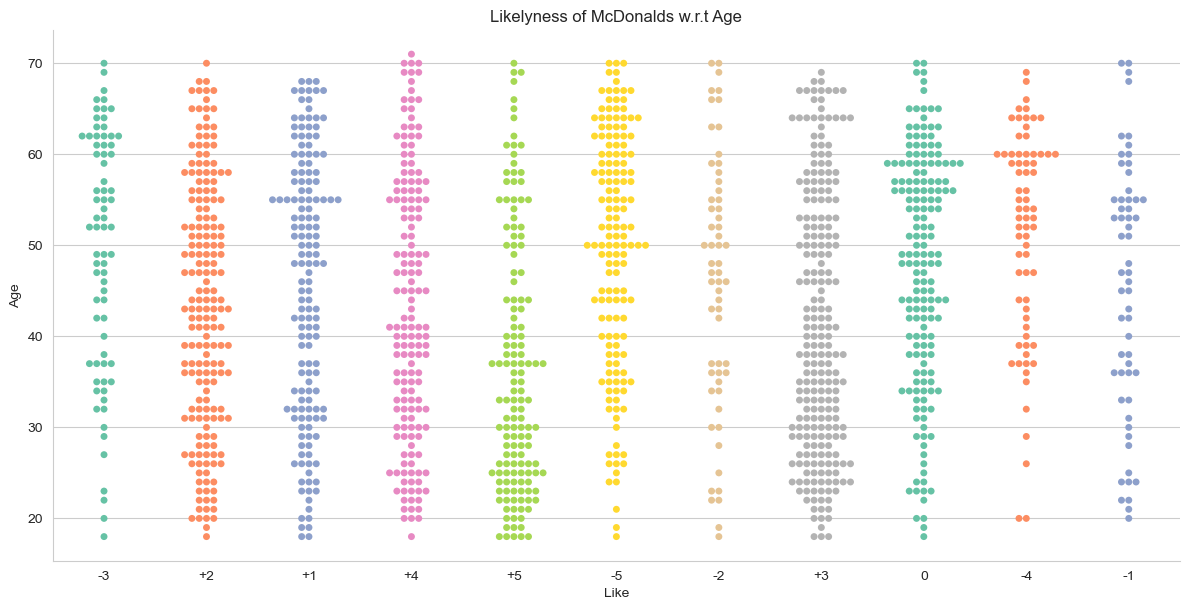

In [45]:
#Customer segmentation - based on pyschographic segmentation

#For convinence renaming the category
df['Like']= df['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})
#Like 
sns.catplot(x="Like", y="Age",data=df, 
            orient="v", height= 6, aspect= 2, palette="Set2",kind="swarm")
plt.title('Likelyness of McDonalds w.r.t Age')
plt.show()

In [46]:
from sklearn.decomposition import PCA

In [47]:
#Label encoding for categorical - Converting 11 cols with yes/no

from sklearn.preprocessing import LabelEncoder
def labelling(x):
    df[x] = LabelEncoder().fit_transform(df[x])
    return df

cluter = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cluter:
    labelling(i)
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


In [48]:
#Considering only the 11 cols and converting it into array
x = df.loc[:,cluter].values
x

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]])

In [49]:
#Principal component analysis

from sklearn.decomposition import PCA
from sklearn import preprocessing

MD_pca = preprocessing.scale(x)

pca = PCA(n_components=11)
pc = pca.fit_transform(x)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data = pc, columns = names)
pf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


In [30]:
from bioinfokit.visuz import cluster

In [52]:
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = MD_x.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069


In [22]:
# Print the factor loadings (components)
factor_loadings = np.round(MD_pca.components_, 1)
print("Factor loadings:\n", factor_loadings)

Factor loadings:
 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [23]:
#Considering only the 11 cols and converting it into array
x = df.loc[:,cluter].values
x

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]])

In [53]:
#Principal component analysis

from sklearn.decomposition import PCA
from sklearn import preprocessing

MD_pca = preprocessing.scale(x)

pca = PCA(n_components=11)
pc = pca.fit_transform(x)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data = pc, columns = names)
pf


,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


In [88]:
print("SD of each principal component:")
print(pca.explained_variance_)
print("\nProportion of variance explained by each principal component:")
print(pca.explained_variance_ratio_)
print("\nCumulative proportion of variance explained by each principal component:")
print(np.cumsum(pca.explained_variance_ratio_))

SD of each principal component:
[0.57312398 0.36900226 0.2546408  0.15904032 0.11384214 0.09627033
 0.08392454 0.07569209 0.07035814 0.06192225 0.05612296]

Proportion of variance explained by each principal component:
[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]

Cumulative proportion of variance explained by each principal component:
[0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]


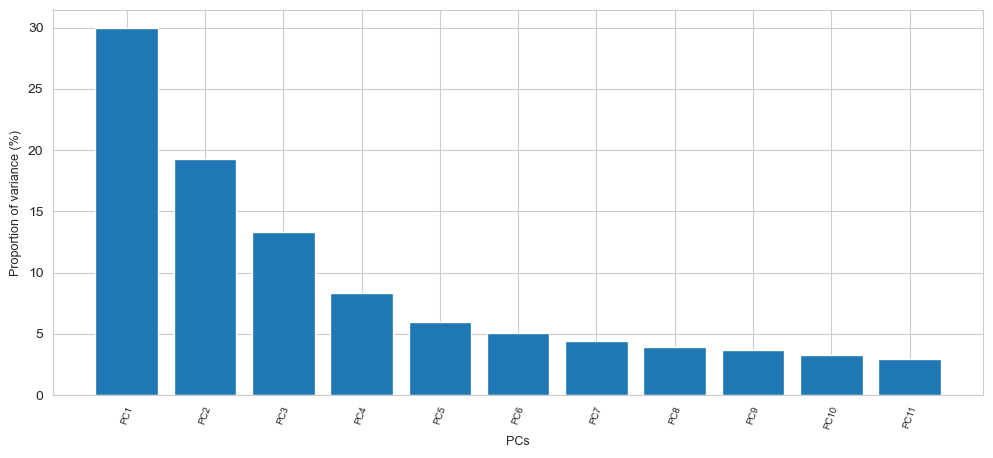

In [56]:
#Scree plot (Elbow test)- PCA
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[pc_list, pca.explained_variance_ratio_],show=True,dim=(12,5))

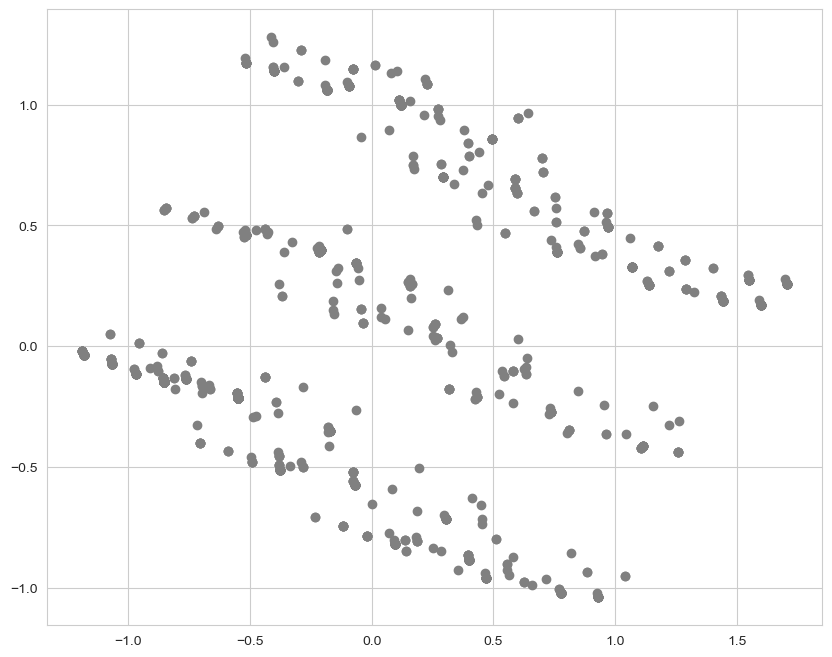

In [57]:
# plot the PCA scores
plt.scatter(pca.fit_transform(MD_x)[:, 0], pca.transform(MD_x)[:, 1], color="grey")

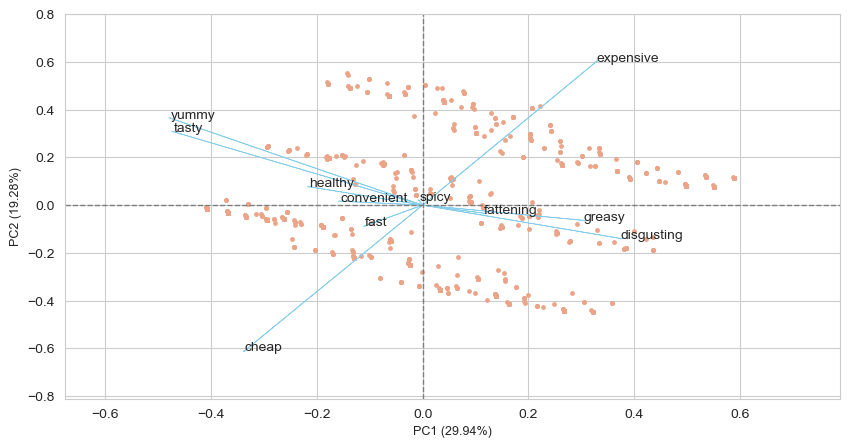

In [55]:
# get PC scores
pca_scores = PCA().fit_transform(x)

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

## Step 5: Extracting Segments

### Using k-Means

In [58]:
import warnings

warnings.filterwarnings('ignore')

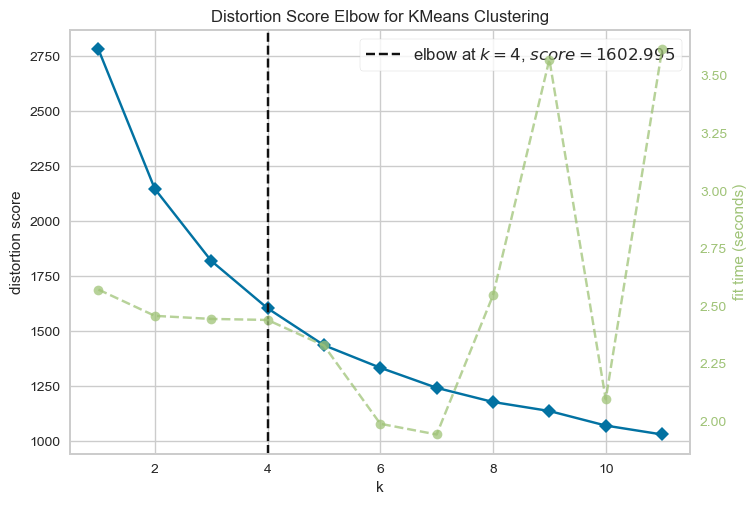

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [59]:
#Using k-means clustering analysis
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(MD_x)
visualizer.show()


In [60]:
#K-means clustering 
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(MD_x)
df['cluster_num'] = kmeans.labels_ 
print (kmeans.labels_) 
print (kmeans.inertia_) #gives within-cluster sum of squares. 
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) #Location of the centroids on each cluster. 

[2 0 0 ... 0 1 3]
1603.0425348972697
8
[[0.85185185 0.95987654 0.13271605 0.90432099 0.61728395 0.85802469
  0.10802469 0.93209877 0.89814815 0.2037037  0.10493827]
 [0.88793103 0.98103448 0.0862069  0.79482759 0.32931034 0.96034483
  0.92241379 0.97586207 0.01724138 0.32068966 0.04310345]
 [0.02302632 0.89144737 0.07236842 0.92434211 0.66776316 0.96381579
  0.93421053 0.15460526 0.01315789 0.07236842 0.38815789]
 [0.02040816 0.68571429 0.08571429 0.91836735 0.69795918 0.73469388
  0.06530612 0.08571429 0.87755102 0.06122449 0.71836735]]


In [61]:
# KMeans clustering with clusters from 2 to 8
from sklearn.cluster import KMeans
def step_flex_kmeans(data, cluster_range, nrep):
    best_kmeans = None
    best_inertia = float('inf')
    np.random.seed(1234)  
    for n_clusters in cluster_range:
        for _ in range(nrep):
            kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
            kmeans.fit(data)
            if kmeans.inertia_ < best_inertia:
                best_inertia = kmeans.inertia_
                best_kmeans = kmeans
    return best_kmeans
cluster_range = range(2, 9)
nrep = 10
MD_kmeans = step_flex_kmeans(MD_x, cluster_range, nrep)

# Relabeling clusters
def relabel_clusters(kmeans, data):
    unique_labels = np.unique(kmeans.labels_)
    new_labels = np.zeros_like(kmeans.labels_)

    for i, label in enumerate(unique_labels):
        cluster_center = kmeans.cluster_centers_[label]
        distances = np.linalg.norm(data - cluster_center, axis=1)
        sorted_indices = np.argsort(distances)
        new_labels[sorted_indices] = i
    return new_labels
MD_kmeans.labels_ = relabel_clusters(MD_kmeans, MD_x)
# Summary of clustering results
print("Best number of clusters:", MD_kmeans.n_clusters)
print("Cluster centers:\n", MD_kmeans.cluster_centers_)
print("Labels:", np.unique(MD_kmeans.labels_))

Best number of clusters: 8
Cluster centers:
 [[ 1.75438596e-02  5.90643275e-01  7.60233918e-02  9.64912281e-01
   8.65497076e-01  7.13450292e-01  3.50877193e-02  6.43274854e-02
   9.70760234e-01  4.09356725e-02  8.47953216e-01]
 [ 8.51851852e-01  9.85185185e-01  8.51851852e-02  1.00000000e+00
   0.00000000e+00  9.70370370e-01  9.18518519e-01  9.77777778e-01
   2.59259259e-02  2.51851852e-01  1.85185185e-02]
 [ 8.37370242e-01  9.82698962e-01  1.21107266e-01  9.86159170e-01
   1.00000000e+00  9.48096886e-01  8.89273356e-01  9.51557093e-01
   1.14186851e-01  1.83391003e-01  1.28027682e-01]
 [ 8.80952381e-01  9.52380952e-01  1.19047619e-01 -2.22044605e-16
   2.38095238e-02  9.52380952e-01  8.17460317e-01  9.68253968e-01
   1.34920635e-01  7.53968254e-01  7.93650794e-03]
 [-3.33066907e-16  9.42028986e-01  5.79710145e-02  9.20289855e-01
   5.43478261e-01  9.71014493e-01  9.27536232e-01  5.55111512e-16
   2.89855072e-02  1.01449275e-01 -1.66533454e-16]
 [ 9.26605505e-01  9.58715596e-01  9.174

In [62]:
#we can see each cluster size
from collections import Counter
Counter(kmeans.labels_)

Counter({2: 304, 0: 324, 1: 580, 3: 245})

In [66]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import numpy as np
import matplotlib.pyplot as plt

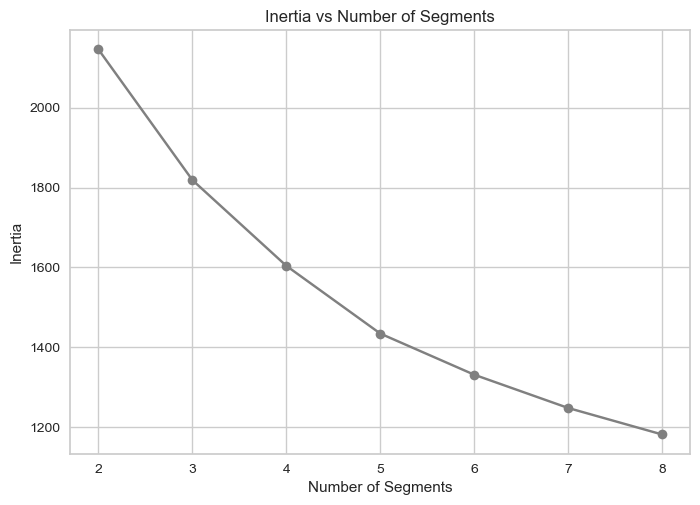

In [67]:
inertia_values = []
cluster_range = range(2, 9)
nrep = 10
np.random.seed(1234)
for n_clusters in cluster_range:
    inertia_list = []
    for _ in range(nrep):
        kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
        kmeans.fit(MD_x)
        inertia_list.append(kmeans.inertia_)
    inertia_values.append(np.min(inertia_list))

plt.plot(cluster_range, inertia_values, marker='o', color='grey')
plt.xlabel('Number of Segments')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of Segments')
plt.grid(True)
plt.show()

In [74]:
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample
# Bootstrapped clustering
def boot_flexclust(data, cluster_range, nrep, nboot):
    np.random.seed(1234)
    stability_scores = {k: [] for k in cluster_range}

    for n_clusters in cluster_range:
        for _ in range(nboot):
            # Resample the data with replacement
            boot_data = resample(data)
            
            # Fit k-means to the original data
            original_kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
            original_kmeans.fit(data)
            original_labels = original_kmeans.labels_
            
            # Fit k-means to the bootstrapped data
            boot_kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
            boot_kmeans.fit(boot_data)
            boot_labels = boot_kmeans.predict(data)
            
            # Calculate the adjusted Rand index
            ari = adjusted_rand_score(original_labels, boot_labels)
            stability_scores[n_clusters].append(ari)
    
    return stability_scores

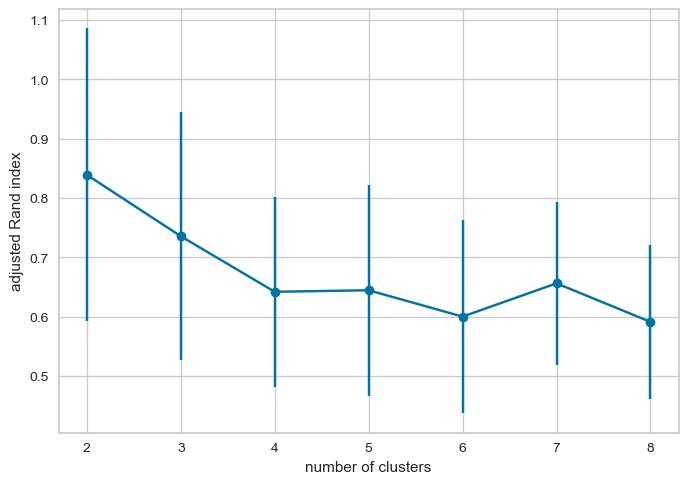

In [71]:
# set the random seed
np.random.seed(1234)

# perform K-means clustering with 2 to 8 clusters and 10 repetitions
n_clusters = range(2, 9)
n_reps = 10
scores = []
for k in n_clusters:
    km = KMeans(n_clusters=k, max_iter=300, n_init=n_reps).fit(MD_x)
    km_labels = km.labels_
    score_k = []
    for i in range(n_reps):
        km_rep = KMeans(n_clusters=k, max_iter=300, n_init=1).fit(MD_x)
        km_rep_labels = km_rep.labels_
        score_k.append(adjusted_rand_score(km_labels, km_rep_labels))
    scores.append(score_k)

# plot the adjusted Rand index scores for each number of clusters
plt.errorbar(n_clusters, np.mean(scores, axis=1), yerr=np.std(scores, axis=1), fmt="o-")
plt.xlabel("number of clusters")
plt.ylabel("adjusted Rand index")
plt.show()

In [72]:
# count the frequency of each value in the "Like" column
like_counts = df["Like"].value_counts()

# reverse the order of the resulting Series
like_counts = like_counts.iloc[::-1]

# print the results
print(like_counts)

-1     58
-2     59
-4     71
-3     73
+5    143
-5    152
+1    152
+4    160
0     169
+2    187
+3    229
Name: Like, dtype: int64


In [73]:
# convert the "Like" column to numeric and subtract from 6 to create a new column
df["Like.n"] = 6 - pd.to_numeric(df["Like"], errors="coerce")

# count the frequency of each value in the "Like.n" column
like_n_counts = df["Like.n"].value_counts()

# print the results
print(like_n_counts)



3     229
4     187
6     169
2     160
5     152
11    152
1     143
9      73
10     71
8      59
7      58
Name: Like.n, dtype: int64


## step 6. Profiling Segments

In [75]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage

In [76]:
# compute the pairwise distances between the columns of MD_x
D = np.transpose(MD_x)
D = linkage(D, method = "average")

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [25.0, 25.0, 42.5, 42.5],
  [10.0, 10.0, 33.75, 33.75],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [75.0, 75.0, 92.5, 92.5],
  [65.0, 65.0, 83.75, 83.75],
  [21.875, 21.875, 74.375, 74.375]],
 'dcoord': [[0.0, 15.132745950421556, 15.132745950421556, 0.0],
  [0.0, 13.820274961085254, 13.820274961085254, 0.0],
  [0.0, 16.837294569763987, 16.837294569763987, 13.820274961085254],
  [0.0, 23.67244402390833, 23.67244402390833, 16.837294569763987],
  [15.132745950421556,
   24.097479054882314,
   24.097479054882314,
   23.67244402390833],
  [0.0, 18.303005217723125, 18.303005217723125, 0.0],
  [0.0, 22.260923119338788, 22.260923119338788, 18.303005217723125],
  [0.0, 23.646302388396077, 23.646302388396077, 22.260923119338788],
  [0.0, 26.301594692930717, 26.301594692930717, 23.646302388396077],
  [24.097479054882314,
   30.24915897946193,
   30.24915897946193,
   26.301594692930717

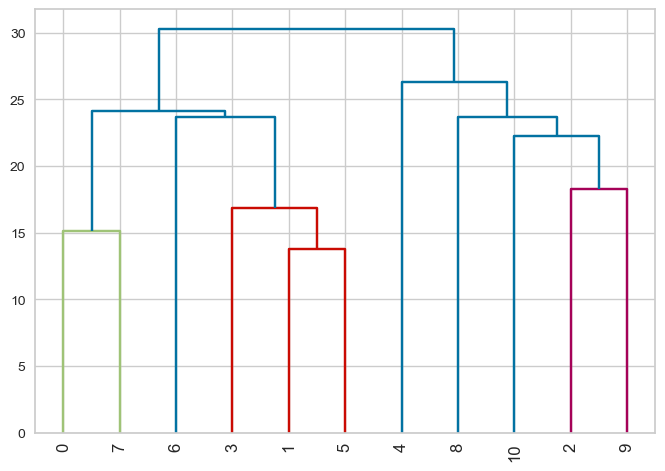

In [77]:
# plot the dendrogram
dendrogram(D, truncate_mode = "lastp", p = 12, leaf_rotation = 90,
           leaf_font_size = 12, show_contracted = True)

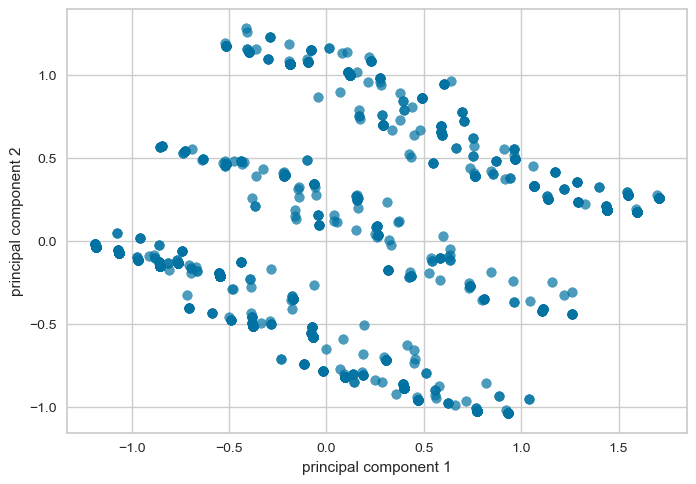

In [78]:
import matplotlib.pyplot as plt

# get the coordinates of the data projected onto the first two principal components
proj_data = pca.fit_transform(MD_x)[:, :2]

# plot the scatter plot
plt.scatter(proj_data[:, 0], proj_data[:, 1], alpha=0.7)
plt.xlabel("principal component 1")
plt.ylabel("principal component 2")
plt.show()


## step 7. Describing Segment

In [79]:
#DESCRIBING SEGMENTS

from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

crosstab =pd.crosstab(df['cluster_num'],df['Like'])
crosstab 

Like,+1,+2,+3,+4,+5,-1,-2,-3,-4,-5,0
cluster_num,,,,,,,,,,,
0,42,60,66,47,44,7,6,7,4,5,36
1,65,90,143,111,99,13,6,2,4,4,43
2,31,31,12,2,0,25,28,34,36,54,51
3,14,6,8,0,0,13,19,30,27,89,39


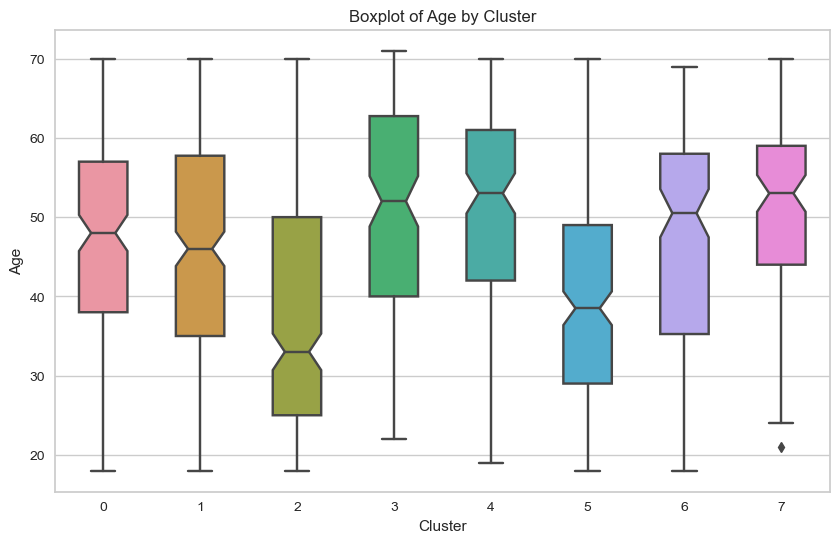

In [80]:
data = pd.DataFrame({
    'Age': df['Age'],
    'Cluster': kmeans.labels_
})

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Age', data=data, width=0.5, notch=True)

# Customizing the plot
plt.title('Boxplot of Age by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show()

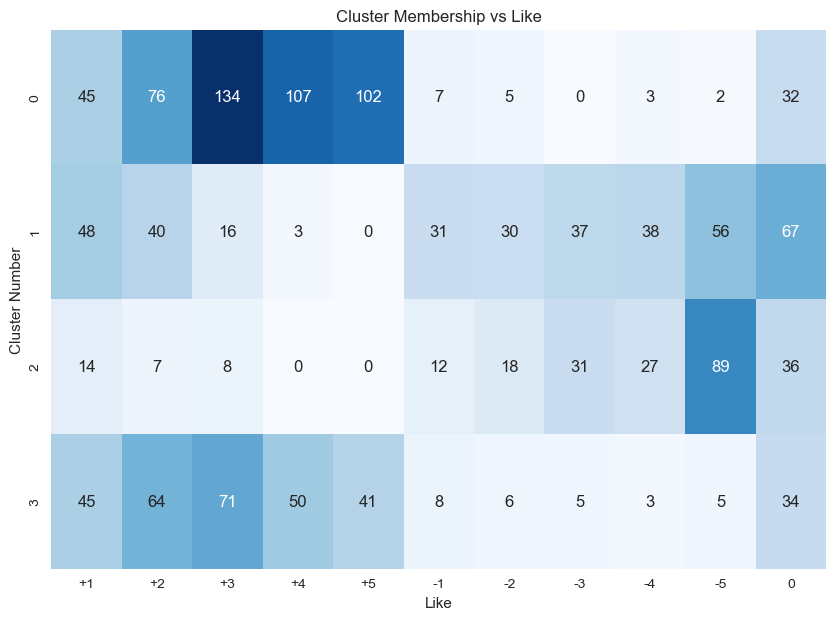

In [81]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, n_init=10, random_state=1234)
kmeans.fit(MD_x)

# Get cluster assignments for the data points
clusters = kmeans.labels_

# Add cluster assignments to the DataFrame
df['Cluster'] = clusters

# Create a mosaic plot (or a stacked bar plot) to visualize the relationship
contingency_table = pd.crosstab(df['Cluster'], df['Like'])

# Plot the mosaic plot
plt.figure(figsize=(10, 7))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Like')
plt.ylabel('Cluster Number')
plt.title('Cluster Membership vs Like')
plt.show()

## Step 8: Selecting (the) Target Segment(s)

In [82]:

#Visit frequency
df['VisitFrequency'] = LabelEncoder().fit_transform(df['VisitFrequency'])
visit = df.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.540123
1,1,2.584483
2,2,2.822368
3,3,2.665306


In [83]:
#Like
df['Like'] = LabelEncoder().fit_transform(df['Like'])
Like = df.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,3.290123
1,1,2.962069
2,2,6.171053
3,3,7.420408


In [84]:
df['IsFemale'] = (df['Gender'] == 'Female').astype(int)

# Calculate the mean of 'IsFemale' for each cluster
female = df.groupby(kmeans.labels_)['IsFemale'].mean()

# Display the result
print(female)

0    0.602339
1    0.581967
2    0.417355
3    0.496988
Name: IsFemale, dtype: float64


In [85]:
#Gender
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
Gender = df.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.521605
1,1,0.398276
2,2,0.411184
3,3,0.571429


In [86]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.521605,3.290123,2.540123
1,1,0.398276,2.962069,2.584483
2,2,0.411184,6.171053,2.822368
3,3,0.571429,7.420408,2.665306


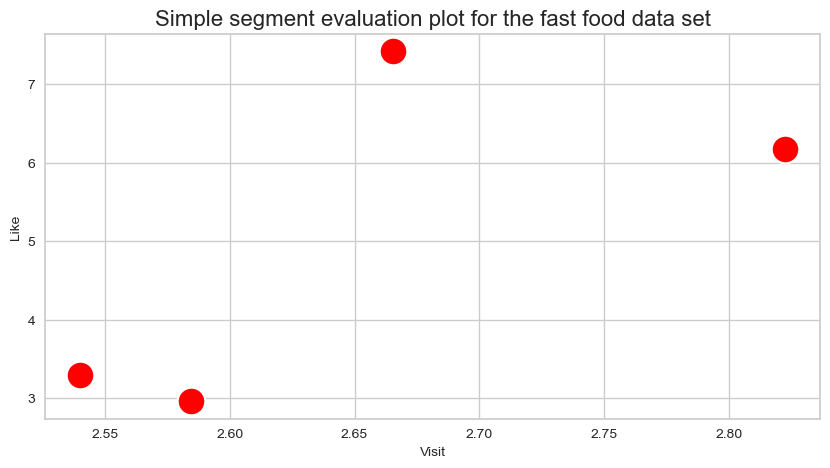

In [87]:
# TO find the target segments

plt.figure(figsize = (10,5))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="red")
plt.title("Simple segment evaluation plot for the fast food data set",
          fontsize = 16) 
plt.xlabel("Visit", fontsize = 10) 
plt.ylabel("Like", fontsize = 10) 
plt.show()

## Step 9. Customising the Marketing Mix

McDonald’s managers decide to focus on segment 3, consisting of young customers who enjoy McDonald's food but find it expensive. 
   
   To cater to this segment, they could introduce a MCSUPERBUDGET line (Price), aimed at meeting their price expectations. 
   
   The strategy aims to foster loyalty, with the hope that as these customers earn more, they will shift to the regular McDonald’s range. 
   
   To avoid cannibalizing the main range, the MCSUPERBUDGET products would have distinctly different features (Product). Promotion would involve using communication channels popular with segment 3 to advertise the new line. 
   
   The distribution (Place) would remain in McDonald’s outlets, but a separate MCSUPERBUDGET lane might be introduced to manage queues and further differentiate from the main product line.

## Step 10: Evaluation and Monitoring

After completing the market segmentation analysis and implementing strategic and tactical marketing activities, it is crucial to evaluate the success of the market segmentation strategy and continuously monitor the market. This ensures adaptability to changes such as segment 3 members earning more money and outgrowing the MCSUPERBUDGET line, or new competitors entering the market. 

By monitoring all potential sources of change, McDonald's management can adjust their marketing strategies to address new market conditions effectively.